In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

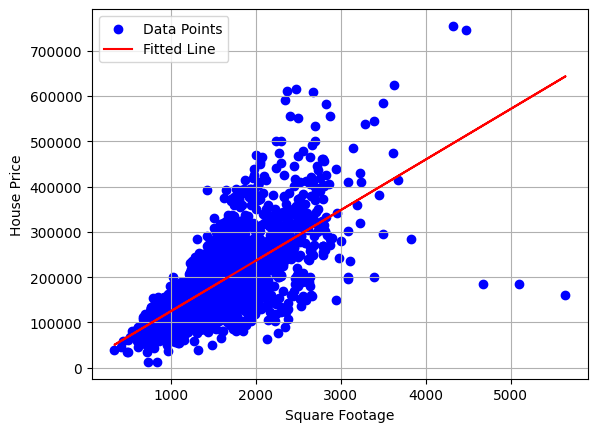

In [16]:

# Load the dataset
# From: https://www.kaggle.com/datasets/prevek18/ames-housing-dataset
df = pd.read_csv('AmesHousing.xls')

# Select relevant columns
X = df[['Gr Liv Area']]  # Above grade (ground) living area square footage
x = df['Gr Liv Area']
y = df['SalePrice']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Plot the results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Fitted Line')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# Display slope and offset from sklearn
display(model.coef_)
model.intercept_

array([111.69400086])

np.float64(13289.634364759637)

In [4]:
# Calculate slope using formula from AIMA book.  See that it agrees with slope
# calculated above with sklearn.
w1 = (len(x) * x.dot(y) - x.sum() * y.sum()) / (len(x) * x.dot(x) - x.sum()**2)
w1

np.float64(111.69400085780036)

In [5]:
# Calculate offset using formula from AIMA book.  See that it agrees with offset
# calculated above with sklearn.
w0 = (y.sum() - w1 * x.sum()) / len(x)
w0

np.float64(13289.634364759535)

In [6]:
# What is the total loss for these parameters?
sum((y_i - (w1* x_i + w0))**2 for x_i, y_i in zip(x, y))

np.float64(9354907186041.094)

In [7]:
# Calculate the losses for a range of w0 (y-intercept) values around the minimum loss value.
# This will enable a plot that will allow us to visually verify that the minimum
# value calculated was correct.
w0_array = np.arange(13289 - 500, 13289 + 500)
loss_array = [sum((y_i - (w1* x_i + w0))**2 for x_i, y_i in zip(x, y)) for w0 in w0_array]

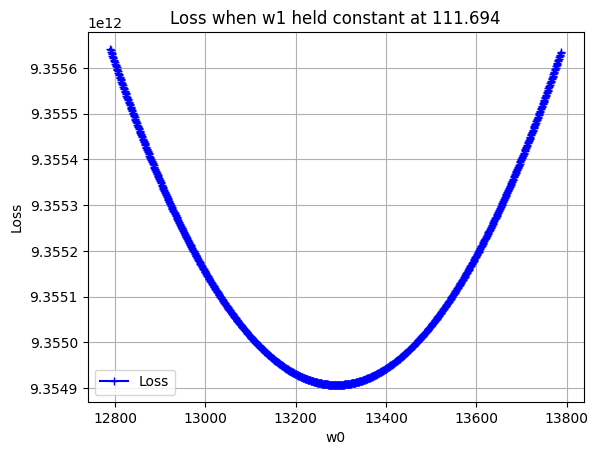

In [8]:
# Create a new figure and axes
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Plot on the new axes
ax.plot(w0_array, loss_array, 'b-+', label='Loss')
ax.set_xlabel('w0')
ax.set_ylabel('Loss')
ax.set_title('Loss when w1 held constant at 111.694')
ax.legend()
ax.grid(True)

plt.show()


In [9]:
# Calculate the losses for a range of w1 (slope) values around the minimum loss value.
# This will enable a plot that will allow us to visually verify that the minimum
# value calculated was correct.
w1_array = np.arange(111 - 20, 111 + 20)
w1_loss_array = [sum((y_i - (w1* x_i + w0))**2 for x_i, y_i in zip(x, y)) for w1 in w1_array]

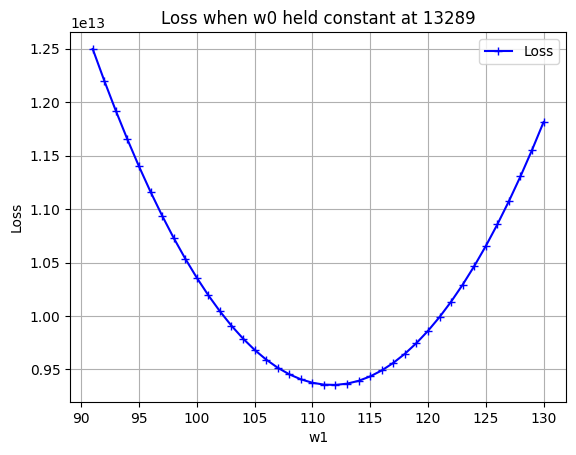

In [10]:
# Create a new figure and axes
w1_fig = plt.figure()
w1_ax = w1_fig.add_subplot(1, 1, 1)

# Plot on the new axes
w1_ax.plot(w1_array, w1_loss_array, 'b-+', label='Loss')
w1_ax.set_xlabel('w1')
w1_ax.set_ylabel('Loss')
w1_ax.set_title('Loss when w0 held constant at 13289')
w1_ax.legend()
w1_ax.grid(True)

plt.show()

In [11]:
# Create a grid of points for a 3D surface function
w0_for_plot = np.linspace(13289 - 13000, 13289 + 13000, 20)
w1_for_plot = np.linspace(111 - 20, 111 + 20, 20)
w0_for_plot, w1_for_plot = np.meshgrid(w0_for_plot, w1_for_plot)

# Define the surface function
loss_for_plot = sum((y_i - (w1_for_plot* x_i + w0_for_plot))**2 for x_i, y_i in zip(x, y))


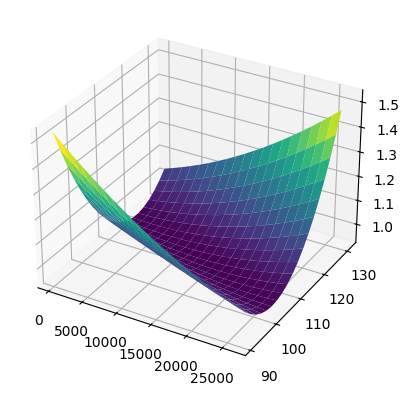

In [12]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w0_for_plot, w1_for_plot, loss_for_plot, cmap='viridis')

plt.show()


In [13]:
# Create a plotly 3D interactive surface plot with the same data.
fig = go.Figure(data=[go.Surface(z=loss_for_plot, x=w0_for_plot[0], y=w1_for_plot[:,0], colorscale='Viridis')])

# Set figure layout
fig.update_layout(
    title='Interactive 3D Surface Plot',
    scene=dict(
        xaxis_title='X AXIS',
        yaxis_title='Y AXIS',
        zaxis_title='Z AXIS'
    ),
    autosize=False,
    width=800,
    height=800,
)

# Display the plot
fig.show()


In [68]:
# Now see if we can learn the weights with batch gradient descent.

def batch_gradient_descent(x, y, learning_rate=0.01, num_iterations=1000):
    """
    Performs batch gradient descent to learn w0 and w1.
    
    Parameters:
    x : numpy array
        Feature data (input variable).
    y : numpy array
        Target data (output variable).
    learning_rate : float
        The learning rate alpha.
    num_iterations : int
        Number of iterations for gradient descent.
        
    Returns:
    w0 : float
        The learned intercept term.
    w1 : float
        The learned slope term.
    cost_history : list
        History of cost function values.
    """
    m = len(y)  # Number of training examples
    w0 = 10000
    w1 = 100
    cost_history = []

    for iteration in range(num_iterations):
        # Compute the hypothesis/predictions
        predictions = w0 + w1 * x

        # Compute the errors
        errors = predictions - y

        # Compute the gradients
        gradient_w0 = (1/m) * np.sum(errors)
        gradient_w1 = (1/m) * np.dot(errors, x)

        # Update the parameters
        w0 -= learning_rate * gradient_w0
        w1 -= learning_rate * gradient_w1

        # Compute and store the cost function value
        cost = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(cost)

        if (iteration + 1) % 1000 == 0:
            if iteration > 0:
                 cost_improvement = cost_history[-2] - cost_history[-1]
            else:
                cost_improvement = 0

            print(f"Iteration {iteration+1}: w0 = {w0:.4f}, w1 = {w1:.4f}, cost = {cost:.4f}, improvement = {cost_improvement:.4f}")

    return w0, w1, cost_history

# Run gradient descent
w0, w1, cost_history = batch_gradient_descent(x, y, learning_rate=0.0000007985, num_iterations=100000)

print(f"Learned parameters:\nIntercept (w0): {w0}\nSlope (w1): {w1}")

Iteration 1000: w0 = 10000.2690, w1 = 101.7530, cost = 1774650826.0085, improvement = 48809.7596
Iteration 2000: w0 = 10000.5378, w1 = 103.2811, cost = 1731975775.9692, improvement = 37087.9339
Iteration 3000: w0 = 10000.8064, w1 = 104.6131, cost = 1699549278.0764, improvement = 28181.1487
Iteration 4000: w0 = 10001.0750, w1 = 105.7741, cost = 1674910104.0035, improvement = 21413.3614
Iteration 5000: w0 = 10001.3434, w1 = 106.7862, cost = 1656188098.6601, improvement = 16270.8837
Iteration 6000: w0 = 10001.6117, w1 = 107.6684, cost = 1641962231.7322, improvement = 12363.3914
Iteration 7000: w0 = 10001.8800, w1 = 108.4374, cost = 1631152738.6783, improvement = 9394.2980
Iteration 8000: w0 = 10002.1481, w1 = 109.1077, cost = 1622939164.4712, improvement = 7138.2436
Iteration 9000: w0 = 10002.4162, w1 = 109.6919, cost = 1616698089.4435, improvement = 5423.9891
Iteration 10000: w0 = 10002.6842, w1 = 110.2012, cost = 1611955810.5045, improvement = 4121.4193
Iteration 11000: w0 = 10002.9522,

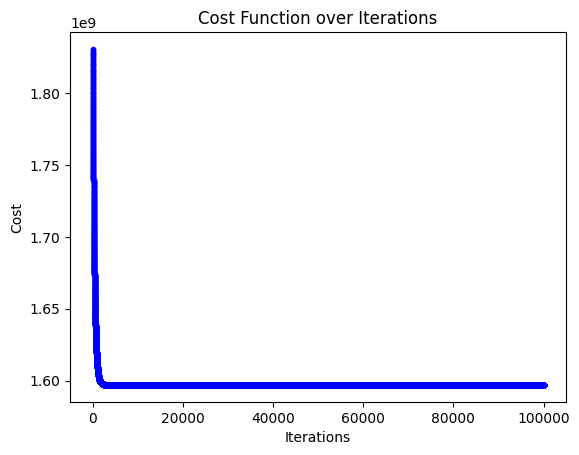

In [66]:
plt.plot(range(len(cost_history)), cost_history, 'b.')
plt.title("Cost Function over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
